# Neste trabalho (Trabalho 4), a idéia é ter uma revisão de PCA, passando por seus conceitos  e construindo um pouco de código

É essencial ver os códigos e comentários de cada célula, além das 3 questões...

In [4]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_csv('iris.txt',names=['m1','m2','m3','m4','esp']) #acertar path para o dataset


In [9]:
df.head()

,m1,m2,m3,m4,esp
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Passo 1: Criar uma matriz com as features numéricas

Standardizar as Features: importante para PCA, KNN,K-means...na dúvida, standardizar!

In [22]:
X=df.to_numpy()[ : , :4]
scaler=StandardScaler()
scaler.fit(X)
XS=scaler.transform(X)
XS[:]

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

Geraremos a Matriz de Covariânvcia<br/>
Na diagonal principal aparecem as variâncias das features.<br/>
Na Standardização, a média já foi para 0 e o desvio padrão para 1. Desvio padrão 1 implica variância 1.<br/>
Fora da diagonal principal aparecem as covariâncias<br/>

In [23]:
COV=np.cov(XS.T)
COV

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

Vamos procurar um novo sistema  de eixos que maximizará as variâncias de cada feature<br/>
E as covariâncias serão anuladas<br/>
Esse novo sistema de eixos é dado pelos autovetores da matriz de covariância<br/>

Utilizaremos Sklearn

In [35]:
from sklearn.decomposition import PCA #fazendo PCA inicialmente com todas as 4 features
p=PCA(4)
p.fit(XS)
XS4=p.transform(XS)#muda XS para o novo sistema de eixos composto pelos autovetores
XS4[:7]

array([[-2.26454173,  0.5057039 , -0.12194335, -0.02307332],
       [-2.0864255 , -0.65540473, -0.22725083, -0.10320824],
       [-2.36795045, -0.31847731,  0.05147962, -0.02782523],
       [-2.30419716, -0.57536771,  0.09886044,  0.06631146],
       [-2.38877749,  0.6747674 ,  0.02142785,  0.03739729],
       [-2.07053681,  1.51854856,  0.03068426, -0.00439877],
       [-2.44571134,  0.07456268,  0.34219764,  0.03809657]])

In [53]:
p

PCA(n_components=4)

In [26]:
p.explained_variance_#os autovalores

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [27]:
p.components_
#os autovetores aparecem nas linhas


array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

<b>Questão 1) Mostre que  p.explained_variance[0] e p.components_[0] são um par autovalor e autovetor da matriz de covariância</b><br/>
Obviamente isso vale para os 4 autovalores e autovetores de COV

In [58]:
p.explained_variance_[0], p.components_[0]

(2.9303537755893116,
 array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))

In [67]:
# Demonstração de que p.explained_variance[0] e p.components_[0] são auto valor e 
# auto vetor da matriz COV
auto_valores, auto_vetores = np.linalg.eig(COV)
auto_valores[0], auto_vetores[0][0], auto_vetores[1][0], auto_vetores[2][0], auto_vetores[3][0]

(2.9303537755893183,
 0.5223716204076599,
 -0.26335491531394034,
 0.5812540055976478,
 0.5656110498826492)

In [55]:
p.explained_variance_ratio_ #observe que com duas das novas features, já temos mais de 95% da variância

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

As features são agora ortogonais...nada fora da diagonal principal<br/>
Vamos observar a nova matriz de covariância COVB (nos novos eixos)<br/>
as features têm alta variância (diagonal principal) e nenhuma covariância (fora da diagonal)<br/>
Mais variância, mais informação...assim, com as duas primeiras features (duas primeiras colunas de XS4)<br/>
já teremos informação suficiente para a visualização, por exemplo. O PCA concentra a variância<br/>
nas primeiras features<br/>

In [56]:
COVB=np.cov(XS4.T)
COVB

array([[ 2.93035378e+00,  1.16657243e-16,  9.18728181e-16,
        -1.02453467e-17],
       [ 1.16657243e-16,  9.27403622e-01, -1.42480174e-16,
         3.87373066e-17],
       [ 9.18728181e-16, -1.42480174e-16,  1.48342226e-01,
        -4.91776642e-17],
       [-1.02453467e-17,  3.87373066e-17, -4.91776642e-17,
         2.07460140e-02]])

<b>Questão 2) Teoricamente, como a Matriz de Covariância é Hermitiana, então os autovetores são ortogonais. Mostre que os 4<br/> autovetores dela são ortogonais entre si (dica..produto interno...).

In [77]:
p.explained_variance_
ortog = []
ortog.append(np.inner(p.components_[0], p.components_[1]))
ortog.append(np.inner(p.components_[0], p.components_[2]))
ortog.append(np.inner(p.components_[0], p.components_[3]))
ortog.append(np.inner(p.components_[1], p.components_[2]))
ortog.append(np.inner(p.components_[1], p.components_[3]))
ortog.append(np.inner(p.components_[2], p.components_[3]))

In [78]:
ortog

[-6.938893903907228e-18,
 5.551115123125783e-17,
 1.6653345369377348e-16,
 2.0816681711721685e-17,
 -4.163336342344337e-17,
 -5.551115123125783e-17]

<b>Questão 3) Com as duas primeiras colunas de XS4, faça a visualização do dataset (cada espécie com uma cor)


In [79]:
esp = df['esp'].copy()
esp = esp.map({'Iris-setosa':0, 'Iris-virginica':2, 'Iris-versicolor':1})

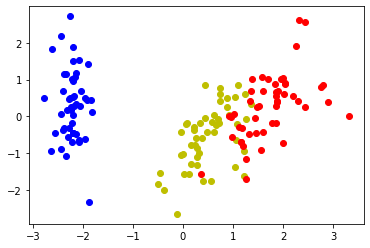

In [82]:
cor = ['bo', 'yo', 'ro']
for i in range(len(XS4)):
    plt.plot(XS4[i,0], XS4[i,1], cor[esp[i]])
plt.show()